In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
sb.set()

In [2]:
studentData = pd.read_csv('student-por.csv', sep=';')
studentData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
studentData.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
studentData.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
studentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
G3Data = studentData['G3']

for i in range(0,649):
    if(G3Data[i] < 10):
        G3Data[i] = 1
    else:
        G3Data[i] = 0

print(G3Data)

0      0
1      0
2      0
3      0
4      0
      ..
644    0
645    0
646    1
647    0
648    0
Name: G3, Length: 649, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_4704\76107027.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G3Data[i] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_4704\76107027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G3Data[i] = 1


In [7]:
classificationList = ["school", "sex", "address", "famsize", "Pstatus", "schoolsup", "famsup", "paid", "activities",  "nursery", "higher", "internet", "romantic"]
classList =[["GP", "MS"], ["M", "F"], ["U", "R"], ["LE3", "GT3"], ["T", "A"], ["yes", "no"], ["yes", "no"], ["yes", "no"], ["yes", "no"], ["yes", "no"], ["yes", "no"], ["yes", "no"], ["yes", "no"]]

C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 1


school Accuracy : 0.8439306358381503

TPR Train : 0.0
TNR Train : 1.0

FPR Train : 0.0
FNR Train : 1.0




C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 0


sex Accuracy : 0.8323699421965318

TPR Train : 0.0
TNR Train : 1.0

FPR Train : 0.0
FNR Train : 1.0




C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 1


address Accuracy : 0.8516377649325626

TPR Train : 0.0
TNR Train : 1.0

FPR Train : 0.0
FNR Train : 1.0




C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 0


famsize Accuracy : 0.8439306358381503

TPR Train : 0.0
TNR Train : 1.0

FPR Train : 0.0
FNR Train : 1.0




C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 0


Pstatus Accuracy : 0.8477842003853564

TPR Train : 0.0
TNR Train : 1.0

FPR Train : 0.0
FNR Train : 1.0




C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 1


schoolsup Accuracy : 0.8670520231213873

TPR Train : 0.0
TNR Train : 1.0

FPR Train : 0.0
FNR Train : 1.0




C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 0


famsup Accuracy : 0.8439306358381503

TPR Train : 0.0
TNR Train : 1.0

FPR Train : 0.0
FNR Train : 1.0




C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 0


paid Accuracy : 0.8554913294797688

TPR Train : 0.0
TNR Train : 1.0

FPR Train : 0.0
FNR Train : 1.0




C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 0


activities Accuracy : 0.8420038535645472

TPR Train : 0.0
TNR Train : 1.0

FPR Train : 0.0
FNR Train : 1.0




C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 1


nursery Accuracy : 0.8554913294797688

TPR Train : 0.0
TNR Train : 1.0

FPR Train : 0.0
FNR Train : 1.0




C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 1


higher Accuracy : 0.8323699421965318

TPR Train : 0.0
TNR Train : 1.0

FPR Train : 0.0
FNR Train : 1.0




C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 0


internet Accuracy : 0.8458574181117534

TPR Train : 0.0
TNR Train : 1.0

FPR Train : 0.0
FNR Train : 1.0




C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_4704\2917592467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xData[j] = 0


romantic Accuracy : 0.8400770712909441

TPR Train : 0.0
TNR Train : 1.0

FPR Train : 0.0
FNR Train : 1.0




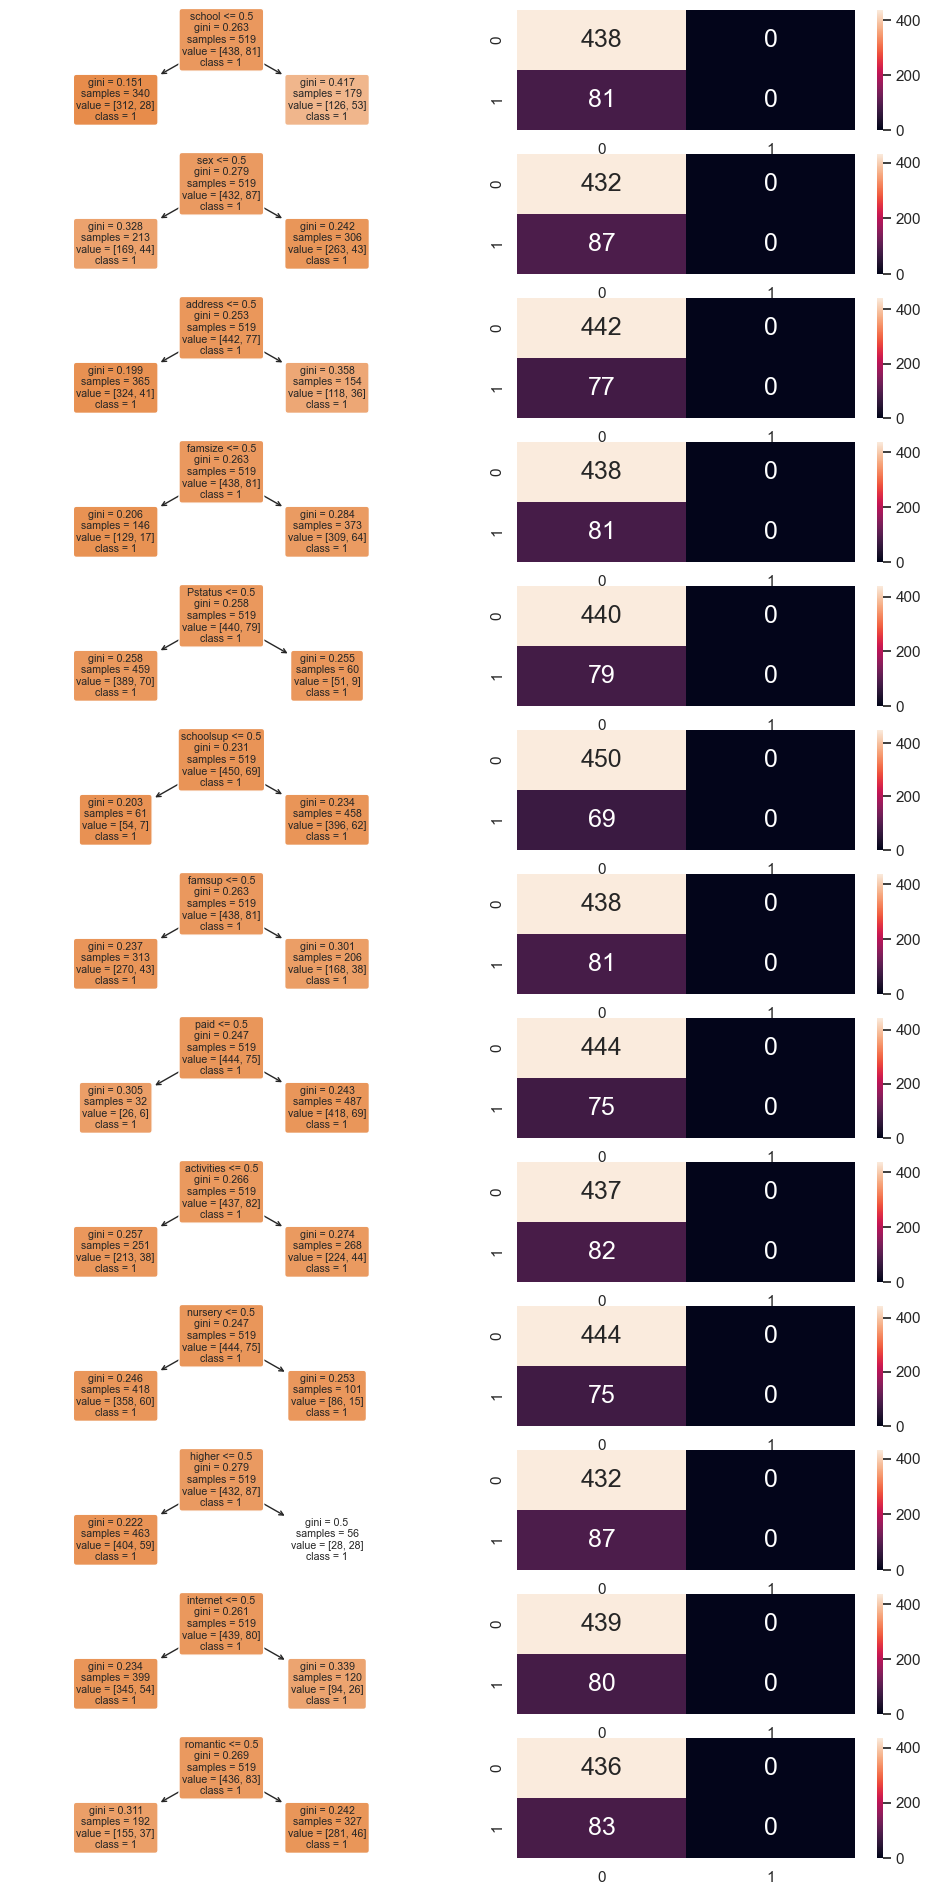

In [8]:
f, axes = plt.subplots(13, 2, figsize=(12, 24))

for i in range(0, 13):
    
    # Create x dataset
    xData = studentData[classificationList[i]]

    # Categotize x data into 0 and 1
    for j in range(0,649):
        if(xData[j] == classList[i][0]):
            xData[j] = 0
        elif(xData[j] == classList[i][1]):
            xData[j] = 1
    
    # instantiate decision tree with max-depth 4
    dectree_train = DecisionTreeClassifier(max_depth = 4)
    
    # instantiate x and y datasets
    y = pd.DataFrame(G3Data)
    x = pd.DataFrame(xData)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

    # Train decison tree
    dectree_train.fit(X_train, y_train)
    
    # plot tree
    plot_tree(dectree_train, filled=True, rounded=True, 
              feature_names=X_train.columns, 
              class_names=["1","0"], ax = axes[i, 0])
    
    # predictor
    y_train_pred = dectree_train.predict(X_train)

    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[i, 1])
    
    #Analysis
    print(classificationList[i], "Accuracy :", dectree_train.score(X_train, y_train))
    print()

    cmTrain = confusion_matrix(y_train, y_train_pred)
    tpTrain = cmTrain[1][1] 
    fpTrain = cmTrain[0][1]
    tnTrain = cmTrain[0][0] 
    fnTrain = cmTrain[1][0]

    print("TPR Train :", (tpTrain/(tpTrain + fnTrain)))
    print("TNR Train :", (tnTrain/(tnTrain + fpTrain)))
    print()

    print("FPR Train :", (fpTrain/(tnTrain + fpTrain)))
    print("FNR Train :", (fnTrain/(tpTrain + fnTrain)))
    print()
    print()
